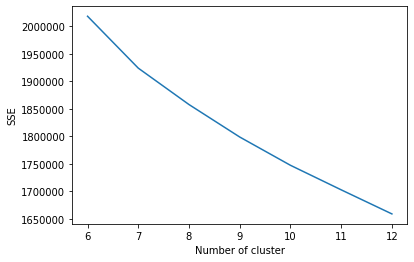

In [37]:
import numpy as np
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score, log_loss, normalized_mutual_info_score

# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

#Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#Normalization
x_train = x_train/255.0
x_train = x_train.reshape(-1, 784).astype('float32')

x_test = x_test/255.0
x_test = x_test.reshape(-1, 784).astype('float32')


#Partitioning of dataset into validation set
x_train = x_train[5000:]
x_valid = x_train[:5000]
y_train = y_train[5000:]
y_valid = y_train[:5000]

#K-Means with no. of clusters range between 6 - 13
sse = {}
for k in range(6, 13):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init = 20, n_jobs=4, verbose=1)
    kmeans = kmeans.fit(x_train)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

#Plot the graph with SSE vs no. of cluster
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [38]:
from sklearn.utils.linear_assignment_ import linear_assignment

def matrix_cost(cm):
    s = np.max(cm)
    return (- cm + s)

def evaluate(x, y):
    #predict the target label
    pred = km.predict(x)
    
    #clustering metrics -  normalized_mutual_info_score
    score = normalized_mutual_info_score(y, pred)
    print('Clustering Score with K-Means using NMI:', score)
    
    # Compute confusion matrix
    cm = confusion_matrix(y, pred)
    print('Confusion Matrix based on K-Means clustering:')
    print(cm)
    
    #Reordering of confusion matrix using linear assignment - Hungarian Algorithm 
    indexes = linear_assignment(matrix_cost(cm))
    js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
    cm2 = cm[:, js]
    print('The reordered confusion matrix')
    print(cm2)
    
    #compute accuracy from the new reordered confusion matrix - divide the sum of the diagonal elements by number of data
    accuracy = np.trace(cm2) / np.sum(cm2)
    print('Accuracy based on K-Means clustering:', accuracy*100 , '%')
    return pred
    
#K-Means with no. of cluster=10
km = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=20, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#Train the model with x_train
km.fit(x_train)

print('FOR VALIDATION SET:')
pred_valid = evaluate(x_valid, y_valid)

print('FOR TESTING DATASET:')
pred_test = evaluate(x_test, y_test)



FOR VALIDATION SET:
Clustering Score with K-Means using NMI: 0.5163055775958022
Confusion Matrix based on K-Means clustering:
[[ 52 133   0   0 275   0   2   6   0  17]
 [  7   6   0   0  19   0   0  11   0 428]
 [ 42 154   3   0  12   0   3 298   0   0]
 [ 46  49   0   0 123   0   0   3   0 297]
 [ 20  91   4   0  69   0   0 291   0  11]
 [315   6   1  33   0  22   0   0 119   0]
 [ 61 168   0   0 106   0   8 179   2   4]
 [ 46   0   0  65   0   3   0   0 396   0]
 [ 40  18 200   2   1   0 189  30  15   5]
 [ 10   1   0 263   0 203   0   0  17   0]]
The reordered confusion matrix
[[275  17   6   0   2  52 133   0   0   0]
 [ 19 428  11   0   0   7   6   0   0   0]
 [ 12   0 298   0   3  42 154   0   3   0]
 [123 297   3   0   0  46  49   0   0   0]
 [ 69  11 291   0   0  20  91   0   4   0]
 [  0   0   0  22   0 315   6 119   1  33]
 [106   4 179   0   8  61 168   2   0   0]
 [  0   0   0   3   0  46   0 396   0  65]
 [  1   5  30   0 189  40  18  15 200   2]
 [  0   0   0 203   0  10

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linea

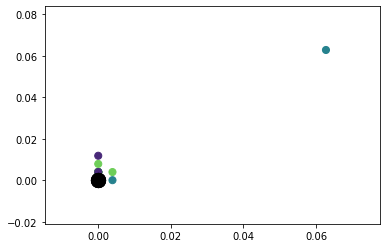

In [39]:
# plt.scatter(x_train[:, 0], x_train[:, 1], s=50)
plt.scatter(x_valid[:, 0], x_valid[:, 1], c=pred_valid, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [10]:
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
import numpy as np

# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

#Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train/ 255.0
x_train = x_train.reshape(-1, 784).astype('float32')

x_test = x_test/ 255.0
x_test = x_test.reshape(-1, 784).astype('float32')


#Partitioning of dataset into validation set
x_train = x_train[5000:]
x_valid = x_train[:5000]
y_train = y_train[5000:]
y_valid = y_train[:5000]

In [30]:
from keras.layers import Dense, Input
from keras.models import Model

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='sigmoid', name="encoder_output")(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_34 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_35 (Dense)             (None, 64)                4160      
_________________________________________________________________
encoder_output (Dense)       (None, 32)                2080      
_________________________________________________________________
dense_36 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_37 (Dense)             (None, 64)                416

In [8]:
autoencoder.get_layer('encoder_output')

In [31]:
#  this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# train the autoencoder using train-data
train_history = autoencoder.fit(x_train, x_train, epochs=100, batch_size=2048, validation_data=(x_valid, x_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 1s 20us/step - loss: 0.1267 - val_loss: 0.0762
Epoch 2/100
55000/55000 [==============================] - 1s 18us/step - loss: 0.0709 - val_loss: 0.0650
Epoch 3/100
55000/55000 [==============================] - 1s 18us/step - loss: 0.0570 - val_loss: 0.0476
Epoch 4/100
55000/55000 [==============================] - 1s 18us/step - loss: 0.0437 - val_loss: 0.0401
Epoch 5/100
55000/55000 [==============================] - 1s 21us/step - loss: 0.0377 - val_loss: 0.0350
Epoch 6/100
55000/55000 [==============================] - 1s 24us/step - loss: 0.0334 - val_loss: 0.0312
Epoch 7/100
55000/55000 [==============================] - 1s 24us/step - loss: 0.0297 - val_loss: 0.0282
Epoch 8/100
55000/55000 [==============================] - 1s 24us/step - loss: 0.0276 - val_loss: 0.0269
Epoch 9/100
55000/55000 [==============================] - 1s 23us/step - loss: 0.0264 - val_loss: 0.02

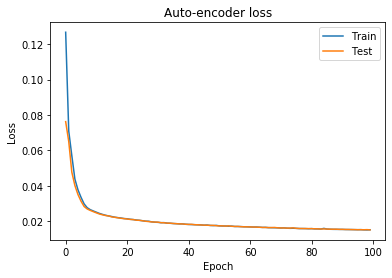

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation loss values obtained while training the autoencoder
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Auto-encoder loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [33]:
#Perform k-means clutering using the output from encoder layer of autoencoder

encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder_output').output)

# predict the output using encoder
pred_train = encoder.predict(x_train)
pred_valid = encoder.predict(x_valid)

km = KMeans(n_jobs=-1, n_clusters=10, n_init=20, random_state=1)
km.fit(pred_auto_train)
pred = km.predict(pred_auto)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score, log_loss, normalized_mutual_info_score
from sklearn.utils.linear_assignment_ import linear_assignment
import numpy as np

print('K-Means Clutering Model:')

score = normalized_mutual_info_score(y_valid, pred)
print('Clustering Score using NMI:', score)

# Compute the accuracy
matrix = confusion_matrix(y_valid, pred)
print('Confusion Matrix:')
print(matrix)


def cost_matrix(cm):
    s = np.max(cm)
    return (- cm + s)

cm = matrix
indexes = linear_assignment(cost_matrix(cm))
i = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
c_m = cm[:, i]
print('The reordered confusion matrix')
print(c_m)

accuracy = np.trace(c_m) / np.sum(c_m)
print('Accuracy for the clustering model using auto-encoder:', accuracy*100 , '%')


K-Means Clutering Model:
Clustering Score using NMI: 0.5855856221826633
Confusion Matrix:
[[  2   0   3 319  93   0   2  66   0   0]
 [  0 379   2   1  10   0   9  70   0   0]
 [  3   0  35   2 236   0 231   5   0   0]
 [  0   9   0  13  48   0  13 435   0   0]
 [  0   0  13   0  74   0 343  56   0   0]
 [  1   0   1   0  10 266   0   0  73 145]
 [  8   1  22 103 206   0 153  35   0   0]
 [  0   0   0   0   0 414   0   0  90   6]
 [207   0 232   0  33   2   2  21   0   3]
 [  0   0   0   0   0  14   0   0 278 202]]
The reordered confusion matrix
[[319   0  93  66   2   0   2   0   3   0]
 [  1 379  10  70   9   0   0   0   2   0]
 [  2   0 236   5 231   0   3   0  35   0]
 [ 13   9  48 435  13   0   0   0   0   0]
 [  0   0  74  56 343   0   0   0  13   0]
 [  0   0  10   0   0 145   1 266   1  73]
 [103   1 206  35 153   0   8   0  22   0]
 [  0   0   0   0   0   6   0 414   0  90]
 [  0   0  33  21   2   3 207   2 232   0]
 [  0   0   0   0   0 202   0  14   0 278]]
Accuracy for the 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


In [35]:
from sklearn.mixture import GaussianMixture
pred_auto_train = encoder.predict(x_train)
pred_auto = encoder.predict(x_valid)

#Perform Gaussian Mixture clutering using the output from auto-encoder
gmm = GaussianMixture(n_components=10, tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, 
                     random_state=1,verbose=1, verbose_interval=10)

gmm.fit(pred_auto_train)
y_pred = gmm.predict(pred_auto)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score, log_loss, normalized_mutual_info_score

print('Gaussian Mixture Clutering Model:')

score = normalized_mutual_info_score(y_valid, y_pred)
print('Clustering Score using NMI:', score)

# Compute the accuracy
matrix = confusion_matrix(y_valid, y_pred)
print('Confusion Matrix:')
print(matrix)


def cost_matrix(cm):
    s = np.max(cm)
    return (- cm + s)

cm = matrix
indexes = linear_assignment(cost_matrix(cm))
i = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
c_m = cm[:, i]
print('The reordered confusion matrix')
print(c_m)

accuracy = np.trace(c_m) / np.sum(c_m)
print('Accuracy for the clustering model using auto-encoder:', accuracy*100 , '%')

Gaussian Mixture Clutering Model:
Clustering Score using NMI: 0.5947497283409194
Confusion Matrix:
[[ 50   2   0 348   0   0  31   0   0  54]
 [ 47   0   0   0 401   0   7   0   0  16]
 [  3 321   0   3   0   0  75   0   0 110]
 [376   1   1  13  43   0   5   0   0  79]
 [ 37 247   0   2   0   0  24   0   0 176]
 [  0   0 222   0   0  14   2 254   4   0]
 [ 16 232   0 117   0   0  87   0   0  76]
 [  0   0  12   0   0 112   0 383   3   0]
 [  3   1   2   0   0   0 386   2   0 106]
 [  0   0  32   0   0 207   0   9 246   0]]
The reordered confusion matrix
[[348   0   2  50  54   0   0   0  31   0]
 [  0 401   0  47  16   0   0   0   7   0]
 [  3   0 321   3 110   0   0   0  75   0]
 [ 13  43   1 376  79   1   0   0   5   0]
 [  2   0 247  37 176   0   0   0  24   0]
 [  0   0   0   0   0 222  14 254   2   4]
 [117   0 232  16  76   0   0   0  87   0]
 [  0   0   0   0   0  12 112 383   0   3]
 [  0   0   1   3 106   2   0   2 386   0]
 [  0   0   0   0   0  32 207   9   0 246]]
Accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
